In [1]:
from DataFrame import PriceDemand, Cities
from Series import Speed, Direction
from config import COLUMNS
from Time import Hours, Date, DateTime

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import timedelta, date
import math
from random import random
import matplotlib.pyplot as plt

In [2]:
def nan_counter(series):
    return (series.isna().sum()) / len(series)

def fake_evaporation(index):
    
    PROB_NEGATIVE = 0.5
    PROB_LARGE_RANDOM = 0.01
    LARGE_MAGNITUDE = 2
    NOISE_MAGNITUDE = 0.9
    ANGULAR_FREQ = (2*np.pi/350)
    Y_CONSTANT = + 3.5
    
    random_sign = random()
    if(random_sign > PROB_NEGATIVE):
        random_sign = -1
    else:
        random_sign = 1
        
    oscillating_term = (np.cos(ANGULAR_FREQ * index)/2 + Y_CONSTANT)
    noise = (random() * NOISE_MAGNITUDE) * random_sign
    final_val = oscillating_term + noise
    
    large_noise = random()
    if(large_noise > 1 - PROB_LARGE_RANDOM):
        final_val += large_noise * LARGE_MAGNITUDE * random_sign
        
        
    return final_val

In [3]:
cities = Cities()
price_df = PriceDemand()
joined_df = cities.join_price(price_df.get_grouped())

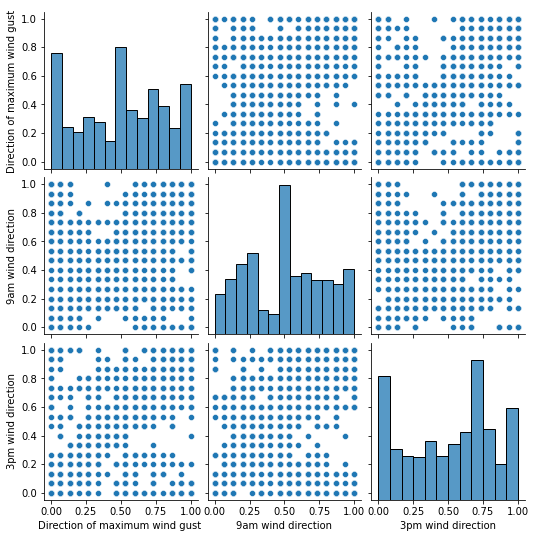

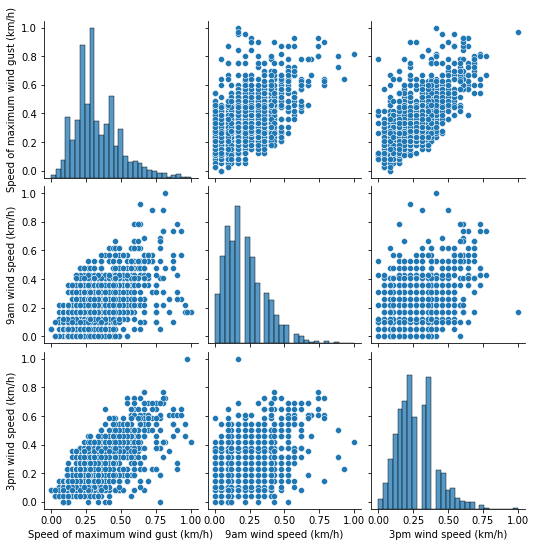

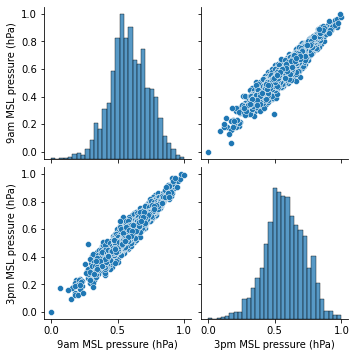

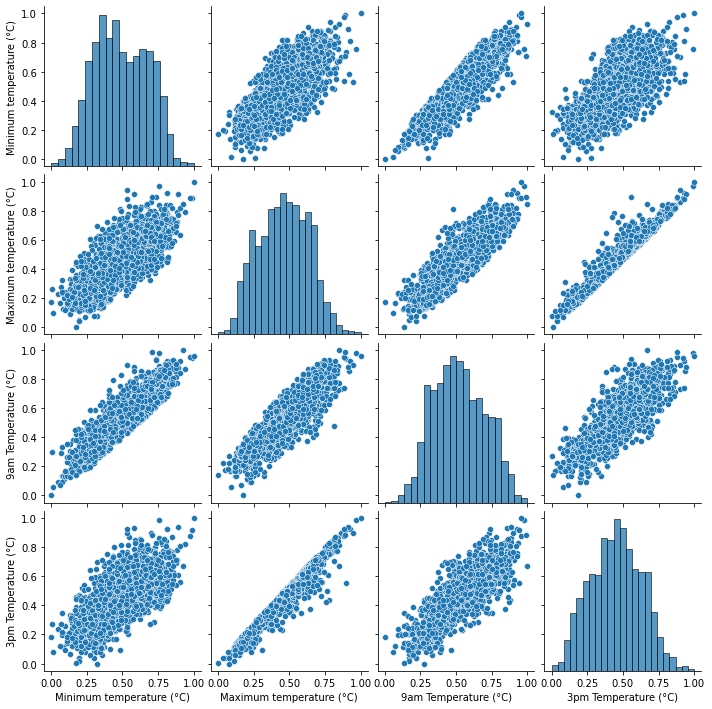

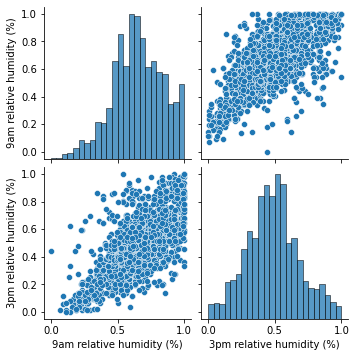

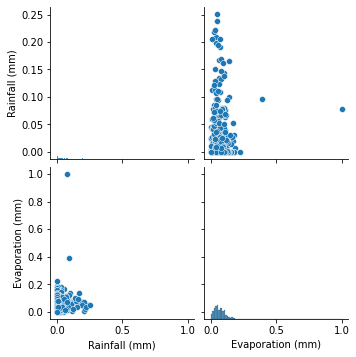

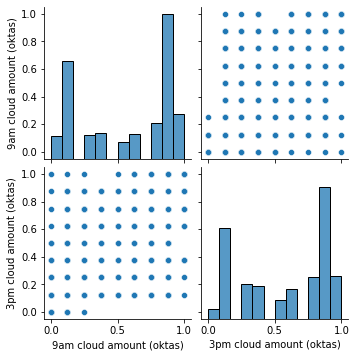

In [4]:
"""
    Plots of minmax normalised columns of the weather dataset within related groups (as per COLUMNS)
"""

min_max = MinMaxScaler()
temp_df = pd.DataFrame(min_max.fit_transform(cities.df.iloc[:, 2:]))
temp_df.columns = cities.df.columns[2:]
normalised_df = pd.concat([cities.df["REGION"], temp_df], axis=1)

[sns.pairplot(normalised_df[cols]) for cols in COLUMNS]


<AxesSubplot:ylabel='Rainfall (mm)'>

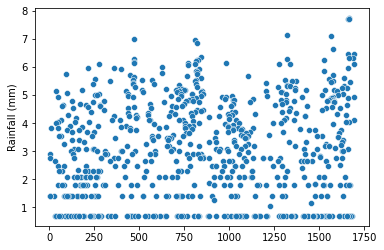

In [20]:
"""
    Rainfall plotted with a logarithmic y scale 
"""

rainfall_logscale = np.log(cities.df["Rainfall (mm)"].sort_values(ascending=False).loc[cities.df["Rainfall (mm)"] > 0] * 10)
sns.scatterplot(x=rainfall_logscale.index, y=rainfall_logscale)

In [4]:
temp_df = pd.DataFrame({"rain": rainfall_logscale})
minmaxed = pd.DataFrame(min_max.fit_transform(temp_df.iloc[:, :]))
sns.scatterplot(x=rainfall_logscale.index, y=minmaxed[0])

NameError: name 'rainfall_logscale' is not defined

In [33]:
minmaxed

,0
0,1.000000
1,0.998248
2,0.996474
3,0.914384
4,0.909764
...,...
693,0.000000
694,0.000000
695,0.000000
696,0.000000


<AxesSubplot:ylabel='Evaporation (mm)'>

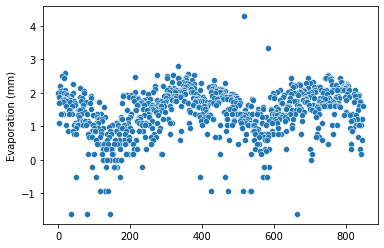

In [6]:
"""
    Evaporation plotted with a logarithmic y scale
"""
evap_logscale = np.log(cities.df["Evaporation (mm)"].sort_values(ascending=False).loc[cities.df["Evaporation (mm)"] > 0])
sns.scatterplot(x=evap_logscale.index, y=evap_logscale)

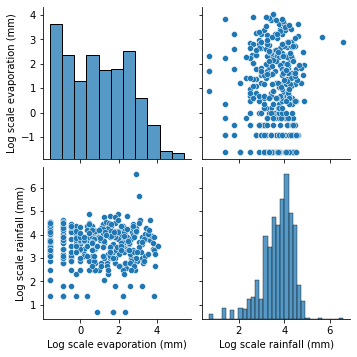

In [16]:
sns.pairplot(pd.DataFrame({"Log scale evaporation (mm)": rainfall_logscale, "Log scale rainfall (mm)": evap_logscale}))

<AxesSubplot:ylabel='Evaporation (mm)'>

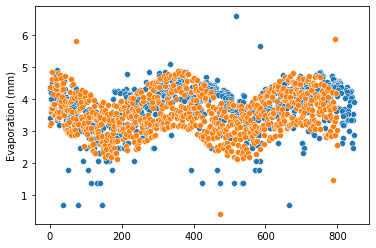

In [7]:
"""
    Evaporation plotted with a logarithmic y scale
"""
evap_logscale = np.log((cities.df["Evaporation (mm)"] * 10).sort_values(ascending=False).loc[cities.df["Evaporation (mm)"] > 0])
sns.scatterplot(x=evap_logscale.index, y=evap_logscale)

evap_fake_vals = [fake_evaporation(t) for t in range(800)]
sns.scatterplot(x=range(800), y=evap_fake_vals)

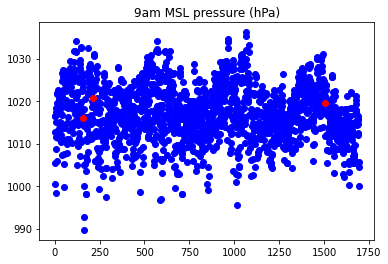

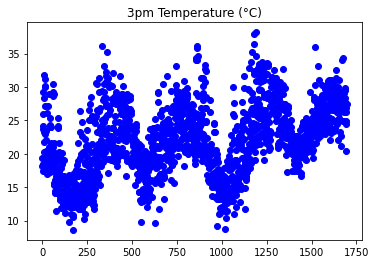

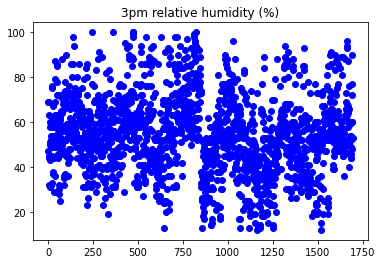

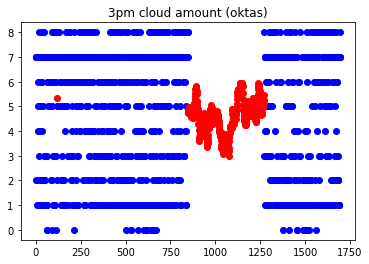

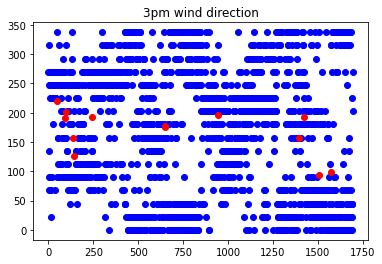

FileNotFoundError: [Errno 2] No such file or directory: './filled_vals/3pm wind speed (km/h).png'

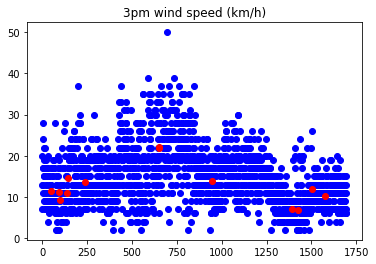

In [9]:
cities.mean_fill_nans(cities.df.columns)

for col in cities.df.columns[2:]:
    plt.scatter(x=cities.get_real_values(col).index, y=cities.get_real_values(col), color='blue')
    plt.scatter(x=cities.get_fake_values(col).index, y=cities.get_fake_values(col), color='red')
    plt.title(col)
    plt.show()
    

In [9]:
cities.mean_fill_nans(cities.columns)

In [10]:
bruh = Date(cities.df["Date"]).sort_index() > "0"

In [11]:
bruh

0       True
1       True
2       True
3       True
4       True
        ... 
1691    True
1692    True
1693    True
1694    True
1695    True
Name: Date, Length: 1696, dtype: bool

In [12]:
cities.df.loc[bruh]

,Date,REGION,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-02-1,VIC1,13.4,20.300000,0.0,7.400000,1.600000,270.0,33.000000,76080.000000,...,7.0,90.0,7.0,1012.8,19.4,69.0,7.0,270.0,13.0,1011.9
1,2021-02-2,VIC1,14.5,19.300000,0.0,3.000000,3.400000,247.5,41.000000,53520.000000,...,7.0,270.0,15.0,1016.5,18.2,47.0,7.0,247.5,20.0,1017.3
2,2021-02-3,VIC1,13.7,25.900000,0.0,5.400000,13.100000,315.0,33.000000,61080.000000,...,5.0,292.5,11.0,1016.5,24.1,44.0,2.0,315.0,7.0,1011.1
3,2021-02-4,VIC1,13.5,30.600000,0.0,6.600000,4.100000,112.5,43.000000,46680.000000,...,7.0,45.0,7.0,1005.5,29.2,32.0,7.0,90.0,28.0,1002.7
4,2021-02-5,VIC1,17.3,29.800000,0.4,7.800000,8.900000,112.5,52.000000,37620.000000,...,7.0,67.5,19.0,1000.5,25.9,63.0,7.0,67.5,24.0,997.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2022-03-27,QLD1,19.6,28.500000,6.2,4.278571,5.200000,0.0,26.000000,52020.000000,...,3.0,225.0,6.0,1015.5,26.2,60.0,7.0,22.5,11.0,1012.0
1692,2022-03-28,QLD1,20.6,21.900000,44.6,4.246154,0.000000,270.0,57.000000,78960.000000,...,8.0,0.0,4.0,1012.1,20.4,90.0,8.0,0.0,7.0,1009.3
1693,2022-03-29,QLD1,19.1,25.400000,63.8,4.183333,1.700000,270.0,22.000000,480.000000,...,8.0,225.0,6.0,1004.6,24.4,77.0,7.0,225.0,6.0,1001.2
1694,2022-03-30,QLD1,20.1,27.500000,13.8,4.145455,2.400000,157.5,43.000000,45120.000000,...,7.0,180.0,11.0,1000.0,26.8,60.0,7.0,202.5,15.0,997.8
